In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

import env

In [2]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/curriculum_logs'
df = pd.read_sql('SELECT * FROM logs JOIN cohorts on logs.cohort_id = cohorts.id', url)

In [3]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


In [4]:
df.user_id.nunique()

911

In [5]:
df.user_id.min(),df.user_id.max()

(1, 981)

In [6]:
### There are 911 unique user_id's numbered 1 through 981

In [7]:
# here I am looking for most frequented path by cohort - per program_id
df.groupby('program_id').path.nunique()

program_id
1     710
2    1913
3     682
4       4
Name: path, dtype: int64

In [8]:
# how many total path requests have there been?
df.shape[0]

847330

In [9]:
# so there have been a total of 847329 path requests to the lessons

<AxesSubplot:title={'center':'Top 10 Most Commonly Requested Pages'}>

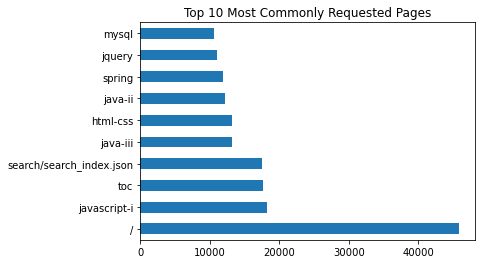

In [10]:
# now I want to find the 10 most requested paths by cohort
df.path.value_counts().head(10).plot.barh(
    title='Top 10 Most Commonly Requested Pages',
)

In [11]:
grouped_df = df.groupby('program_id')
grouped_df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
5,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
6,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
7,2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
8,2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
30,2018-01-26,10:14:47,/,11,1.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1


QUESTION WHY DIDN'T THIS RETURN TO ME A DF THAT IS GROUPED BY PROGRAM_ID?

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [12]:
# only looking at cohort 22 through 139 I need to find path request count and groupby path
df.groupby('path').head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842686,2021-04-19,09:53:36,dataframes,904,137.0,70.117.3.180,137,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,None,3
843898,2021-04-19,16:04:53,appendix/further-reading/jquery/effects,882,135.0,76.250.151.105,135,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2
844832,2021-04-20,10:35:08,dataframes,895,137.0,96.8.253.119,137,Florence,#florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,None,3
845356,2021-04-20,14:22:21,appendix/further-reading/jquery/effects,495,51.0,72.191.50.129,51,Deimos,#deimos,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,None,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847330 entries, 0 to 847329
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        847330 non-null  object 
 1   time        847330 non-null  object 
 2   path        847329 non-null  object 
 3   user_id     847330 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          847330 non-null  object 
 6   id          847330 non-null  int64  
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 97.0+ MB


### Prepare

In [14]:
#change the dtypes to the correct types

In [15]:
df.user_id = df.user_id.astype('object')

In [16]:
df.cohort_id = df.cohort_id.astype('object')

In [17]:
df.id = df.id.astype('object')

In [18]:
df.program_id = df.program_id.astype('object')

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [19]:
df.path.value_counts(ascending = False)

/                                                                45854
javascript-i                                                     18203
toc                                                              17591
search/search_index.json                                         17534
java-iii                                                         13166
                                                                 ...  
11-distributed-ml/8.1-classification                                 1
10.00_Intro                                                          1
content/mysql/relationships/indexes.html                             1
%20https://github.com/RaulCPena                                      1
html-css/css-i/positioning/specimen/MaterialIcons-Regular.ttf        1
Name: path, Length: 2224, dtype: int64

A: It looks like lesson jacascript-i is the most referenced lesson with 1486 requests
A: Also this interesting that this student had their access removed because they worked
fi

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


In [20]:
# I want to concatenate the time and date column
df['date'] = df['date'] + ' ' + df['time']

In [21]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26 09:55:03,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26 09:56:02,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26 09:56:05,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,2018-01-26 09:56:06,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,2018-01-26 09:56:24,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


In [22]:
df = df.drop(columns='time')

In [23]:
df.date = pd.to_datetime(df.date, utc=True)
df = df.set_index('date')

In [24]:
df.head()

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,
2018-01-26 09:55:03+00:00,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:02+00:00,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:05+00:00,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:06+00:00,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:24+00:00,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


In [25]:
# now I need to do a little more prepping

In [26]:
df = df.drop(columns= 'deleted_at')

In [27]:
df.isna().sum()

path          1
user_id       0
cohort_id     0
ip            0
id            0
name          0
slack         0
start_date    0
end_date      0
created_at    0
updated_at    0
program_id    0
dtype: int64

In [28]:
df.dropna(axis = 0,inplace = True)

In [29]:
df.head()

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,,,
2018-01-26 09:55:03+00:00,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:02+00:00,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:05+00:00,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:06+00:00,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:24+00:00,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2


In [30]:
df.isna().sum()

path          0
user_id       0
cohort_id     0
ip            0
id            0
name          0
slack         0
start_date    0
end_date      0
created_at    0
updated_at    0
program_id    0
dtype: int64

In [31]:
request_path_and_params = df.path.str.split('/', expand=True)
request_path_and_params = request_path_and_params.drop(columns=[2,3,4,5,6])

In [32]:
df.shape

(847329, 12)

In [33]:
result = pd.concat([df, request_path_and_params],axis = 1)

In [34]:
result.head()

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,0,1,7
date,,,,,,,,,,,,,,,
2018-01-26 09:55:03+00:00,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,,,None
2018-01-26 09:56:02+00:00,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,java-ii,None,None
2018-01-26 09:56:05+00:00,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,java-ii,object-oriented-programming,None
2018-01-26 09:56:06+00:00,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,slides,object_oriented_programming,None
2018-01-26 09:56:24+00:00,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,javascript-i,conditionals,None


QUESTION: Why is the row count doubled? I concatenated them horizontally

In [35]:
result.shape

(847329, 15)

In [36]:
result.isna().sum()

path               0
user_id            0
cohort_id          0
ip                 0
id                 0
name               0
slack              0
start_date         0
end_date           0
created_at         0
updated_at         0
program_id         0
0                  0
1             145533
7             847328
dtype: int64

In [37]:
# df.path = df.path.str.split('/', expand=True)

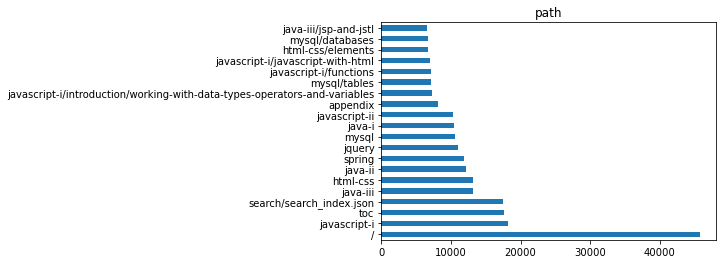

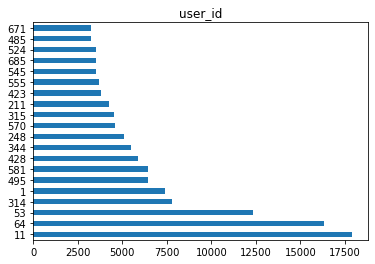

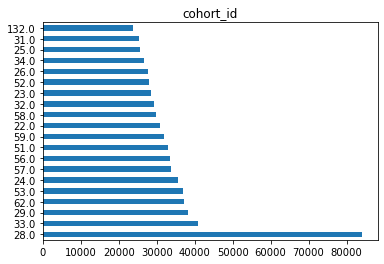

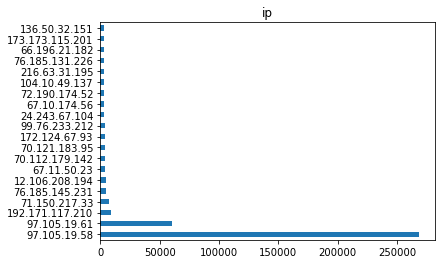

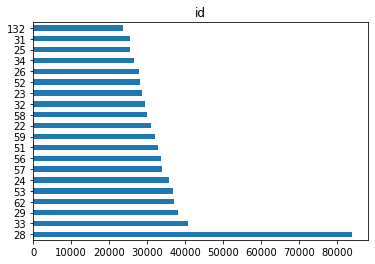

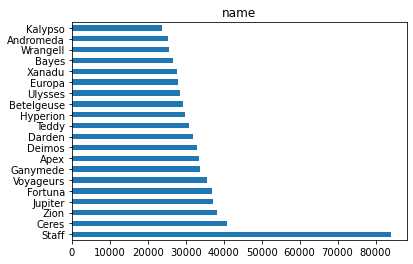

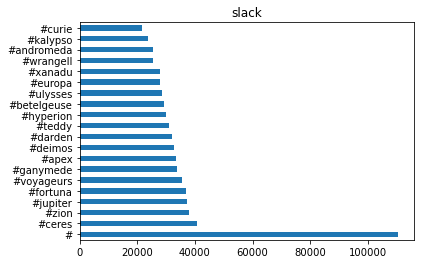

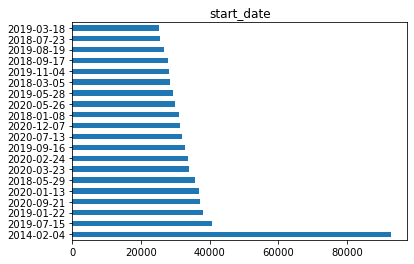

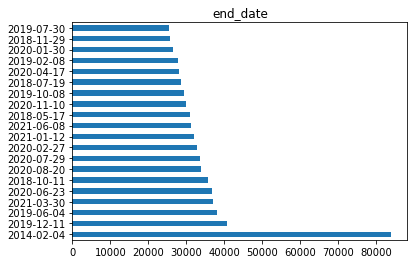

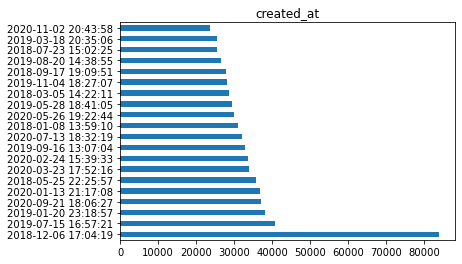

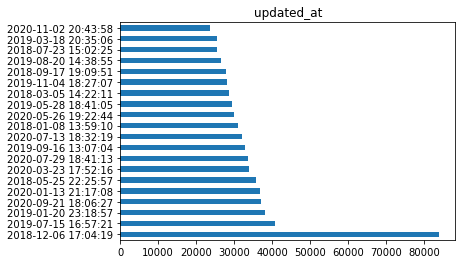

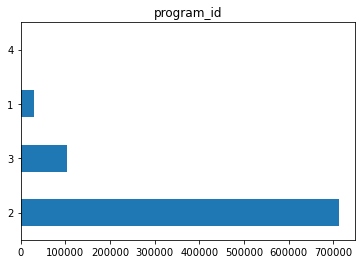

In [38]:
for col in df.columns:
    plt.figure()
    df[col].value_counts().sort_values(ascending = False).head(20).plot.barh(title = col)

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [39]:
# The Ike cohort accessed the lesssons more than any other cohort by far

In [40]:
# I want to know what lessons they accessed the most?
#groupby cohort and lesson?
# conditional probabilities --- cohort given path
path_given_cohort_id = (
    df.groupby('cohort_id')
    .path.value_counts(normalize=True)
    .rename('proba_path_given_cohort_id')
    .reset_index()
)
path_given_cohort_id.head(30)

,cohort_id,path,proba_path_given_cohort_id
0,1.0,/,0.070416
1,1.0,javascript-i,0.033071
2,1.0,html-css,0.024184
3,1.0,javascript-ii,0.022947
4,1.0,spring,0.021597
5,1.0,java-ii,0.018785
6,1.0,java-iii,0.017210
7,1.0,appendix,0.014961
8,1.0,jquery,0.014961
9,1.0,java-i,0.014848


In [41]:
path_given_cohort_id

,cohort_id,path,proba_path_given_cohort_id
0,1.0,/,0.070416
1,1.0,javascript-i,0.033071
2,1.0,html-css,0.024184
3,1.0,javascript-ii,0.022947
4,1.0,spring,0.021597
...,...,...,...
13560,139.0,java-iii/servlets,0.000598
13561,139.0,javascript-i/bom-and-dom/dom,0.000598
13562,139.0,javascript-i/objects,0.000598
13563,139.0,javascript-i/objects/math,0.000598


In [42]:
# I'm lost on this one

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [43]:
# I need to look at user_id and active dates and then look at the number of requests by ip

In [44]:
# user_id by active dates
# conditional probabilities
user_id_given_ip = (
    df.groupby('ip')
    .user_id.value_counts()
    .rename('proba_user_id_given_ip')
    .reset_index()
)
user_id_given_ip

,ip,user_id,proba_user_id_given_ip
0,100.11.170.135,658,114
1,100.19.73.35,658,408
2,100.35.67.162,52,11
3,103.137.12.164,469,9
4,104.1.46.153,136,8
...,...,...,...
7060,99.97.210.12,606,18
7061,99.98.245.245,618,2
7062,99.98.32.165,324,267
7063,99.98.32.97,481,46


In [45]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [46]:
# create a dataframe
start_date_df = value_counts_and_frequencies(df.start_date)
start_date_df

,count,proba
2014-02-04,92921,0.109663
2019-07-15,40730,0.048069
2019-01-22,38096,0.044960
2020-09-21,37109,0.043795
2020-01-13,36902,0.043551
2018-05-29,35636,0.042057
2020-03-23,33844,0.039942
2020-02-24,33568,0.039616
2019-09-16,32888,0.038814
2020-07-13,32015,0.037783


<AxesSubplot:>

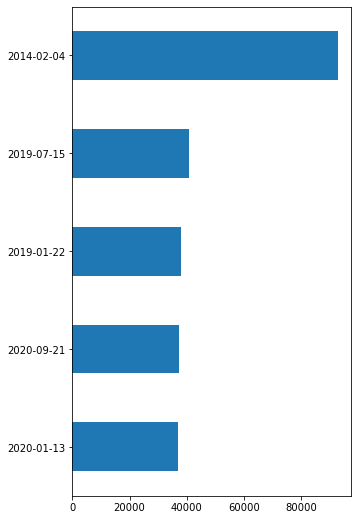

In [47]:
# example -- ip_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))
start_date_df['count'].sort_values().tail(5).plot.barh(figsize=(5,9))

Following Zach's example

In [48]:
#df = df[df.cohort_id.isin([33, 34, 51])]
# I'm choosing to focus on cohort_id
# subset
#df = df[df.cohort_id.isin([22, 23, 24, 25, 26, 27,28, 29, 30, 31, 32, 33, 34, 51, 52, 53, 
                           #55, 56, 57, 58, 59, 60, 61, 62, 132, 133, 134, 135, 137, 138, 139])]

- the subbset is a list of cohorts starting in 2018 when logs started being tracked 
22, 23, 24, 25, 26, 27,28, 29, 30, 31, 32, 33, 34, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 132, 133, 134, 135, 137, 138 139

In [49]:
df.cohort_id.value_counts()
# this shows me that Ceres accessed the lessons the most of all cohorts

28.0     84031
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21581
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [50]:
df.program_id.value_counts()

2    713365
3    103411
1     30548
4         5
Name: program_id, dtype: int64

In [51]:
#know how do I break this down by their active dates?


In [52]:
cohort_requests = df.groupby('cohort_id').resample('W').size().unstack(0)
cohort_requests.head()

cohort_id,1.0,2.0,4.0,5.0,6.0,7.0,8.0,9.0,11.0,12.0,...,59.0,61.0,62.0,132.0,133.0,134.0,135.0,137.0,138.0,139.0
date,,,,,,,,,,,,,,,,,,,,,
2018-01-28 00:00:00+00:00,19.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,74.0,NaN,4.0,NaN,NaN,10.0,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,78.0,NaN,NaN,NaN,NaN,0.0,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,86.0,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,90.0,NaN,NaN,NaN,NaN,0.0,85.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1080x864 with 0 Axes>

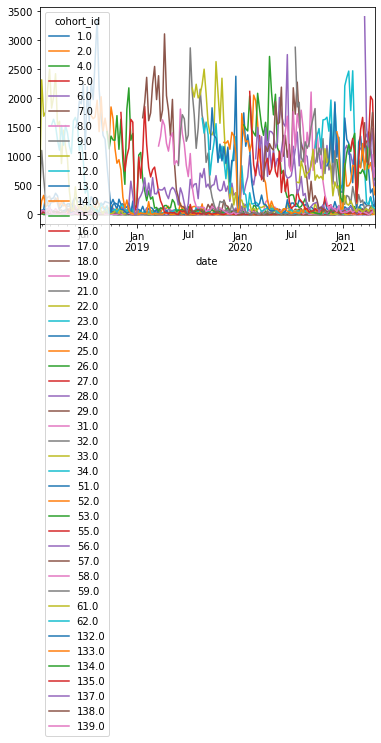

<Figure size 1080x864 with 0 Axes>

In [53]:
from matplotlib.pyplot import figure
cohort_requests.plot()
figure(figsize=(15, 12))

In [54]:
K = 2
N = 5
s = cohort_requests.iloc[:, 11]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2018-01-28 00:00:00+00:00,7.0,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,240.0,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,329.0,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,128.0,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,175.0,175.8,417.400497,-65.800497


Text(0, 0.5, '# of requests')

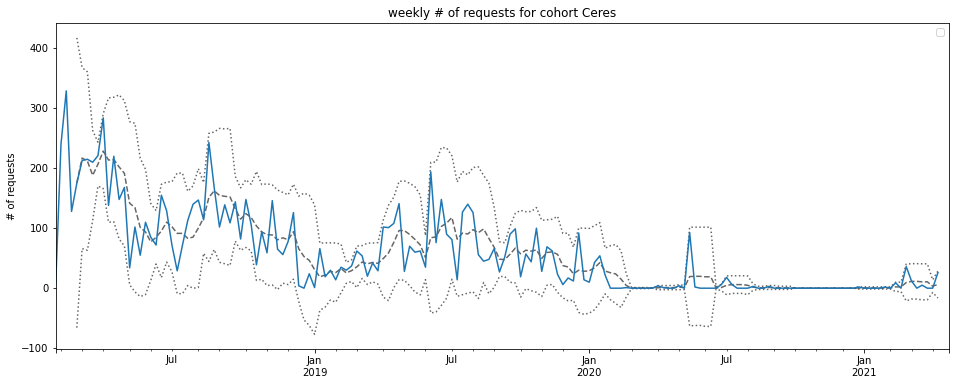

In [55]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Ceres')
plt.ylabel('# of requests')

In [56]:
K = 2
N = 5
s = cohort_requests.iloc[:, 0]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2018-01-28 00:00:00+00:00,19.0,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,74.0,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,78.0,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,86.0,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,90.0,69.4,127.15119,11.64881


Text(0, 0.5, '# of requests')

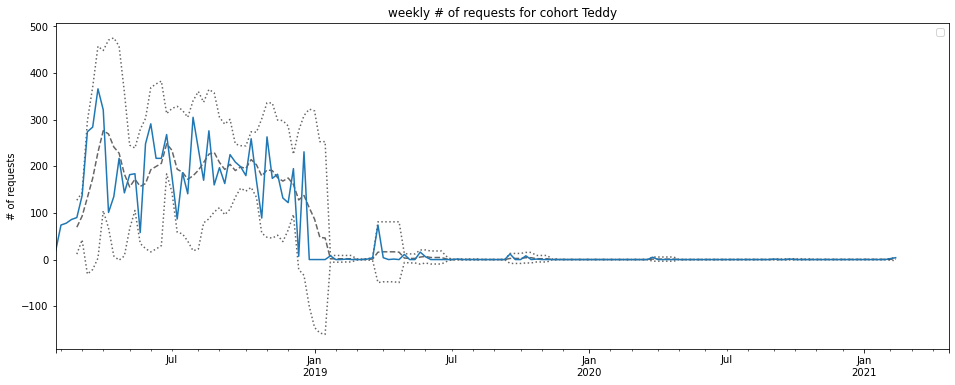

In [57]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Teddy')
plt.ylabel('# of requests')

In [58]:
K = 2
N = 5
s = cohort_requests.iloc[:, 1]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2018-01-28 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,NaN,NaN,NaN,NaN


Text(0, 0.5, '# of requests')

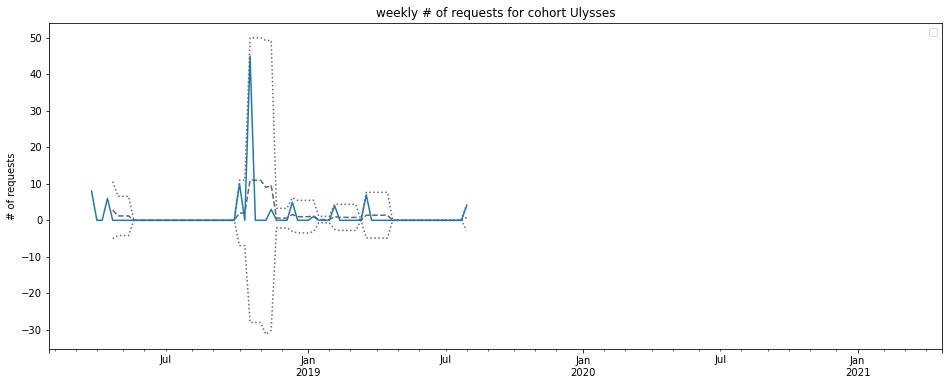

In [59]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Ulysses')
plt.ylabel('# of requests')

In [60]:
K = 2
N = 5
s = cohort_requests.iloc[:, 2]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2018-01-28 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,4.0,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,NaN,NaN,NaN,NaN


Text(0, 0.5, '# of requests')

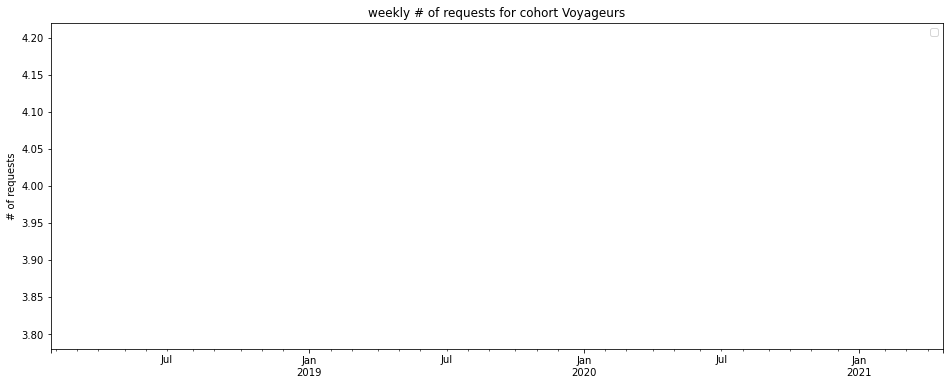

In [61]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Voyageurs')
plt.ylabel('# of requests')

In [62]:
K = 2
N = 5
s = cohort_requests.iloc[:, 3]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2018-01-28 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,NaN,NaN,NaN,NaN


Text(0, 0.5, '# of requests')

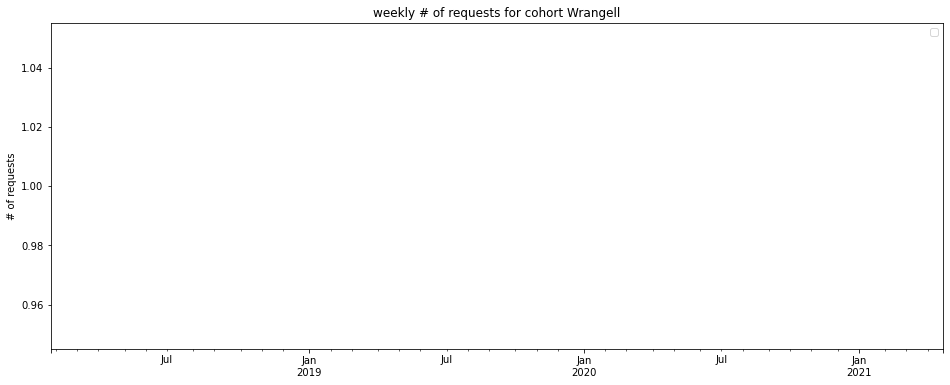

In [63]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Wrangell')
plt.ylabel('# of requests')

In [64]:
K = 2
N = 5
s = cohort_requests.iloc[:, 4]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2018-01-28 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,NaN,NaN,NaN,NaN


Text(0, 0.5, '# of requests')

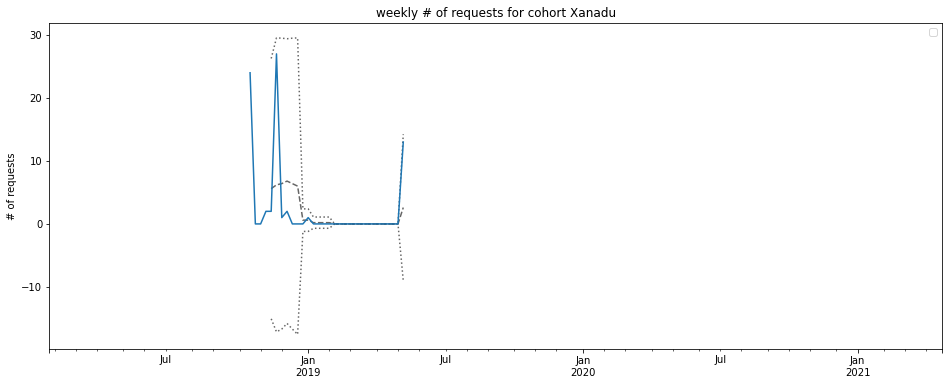

In [65]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Xanadu')
plt.ylabel('# of requests')

In [66]:
K = 2
N = 5
s = cohort_requests.iloc[:, 5]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2018-01-28 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,10.0,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,0.0,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,0.0,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,0.0,NaN,NaN,NaN


Text(0, 0.5, '# of requests')

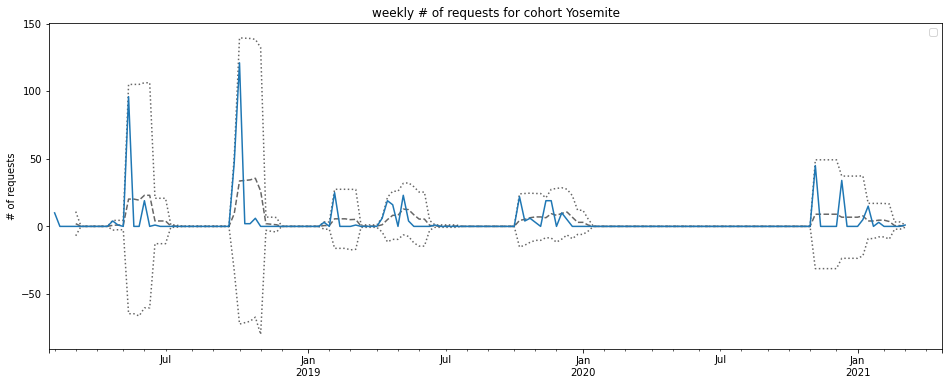

In [67]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Yosemite')
plt.ylabel('# of requests')

In [68]:
K = 2
N = 5
s = cohort_requests.iloc[:, 6]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2018-01-28 00:00:00+00:00,8.0,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,36.0,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,36.0,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,2.0,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,85.0,33.4,99.029262,-32.229262


Text(0, 0.5, '# of requests')

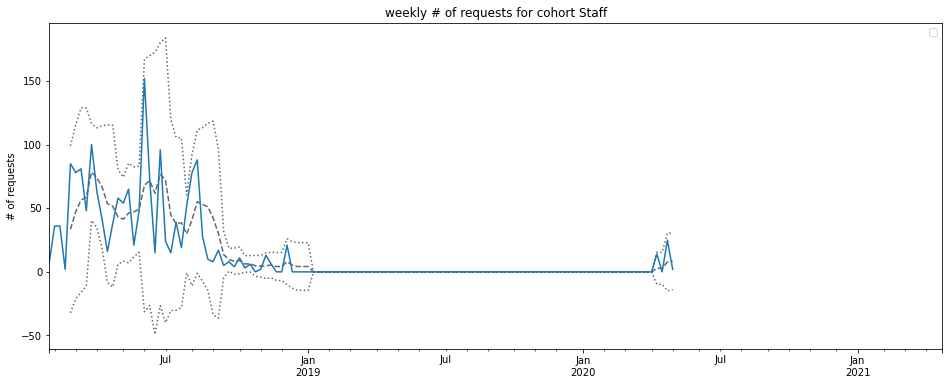

In [69]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Staff')
plt.ylabel('# of requests')

In [70]:
K = 2
N = 5
s = cohort_requests.iloc[:, 7]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2018-01-28 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,NaN,NaN,NaN,NaN


Text(0, 0.5, '# of requests')

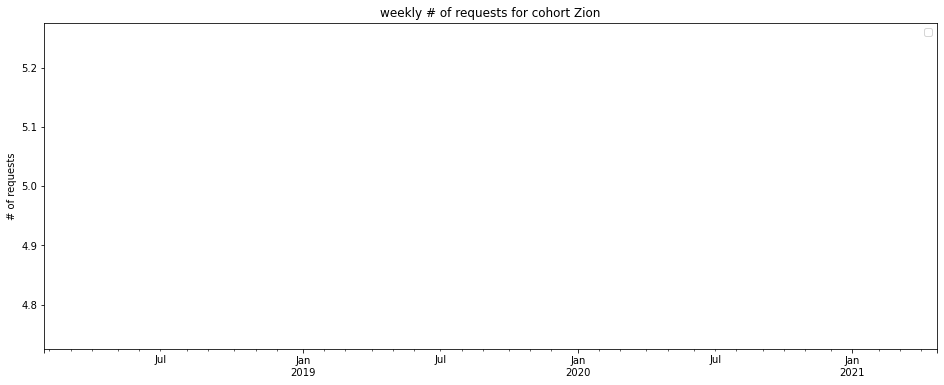

In [71]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Zion')
plt.ylabel('# of requests')

In [72]:
K = 2
N = 5
s = cohort_requests.iloc[:, 8]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2018-01-28 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,NaN,NaN,NaN,NaN


Text(0, 0.5, '# of requests')

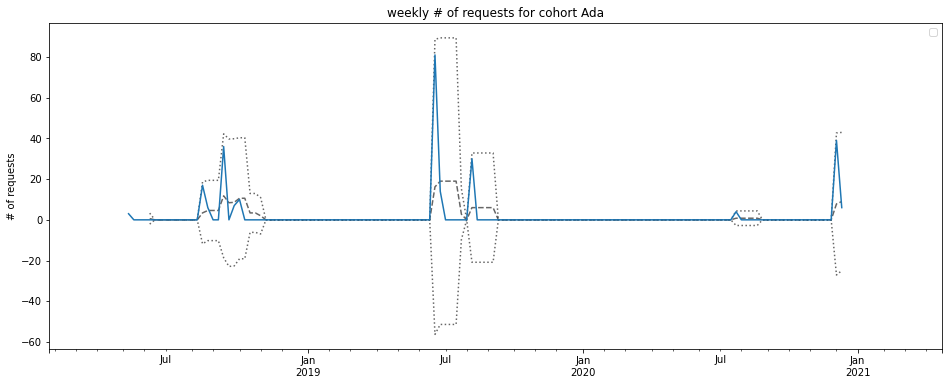

In [73]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Ada')
plt.ylabel('# of requests')

In [74]:
K = 2
N = 5
s = cohort_requests.iloc[:, 9]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2018-01-28 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,91.0,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,0.0,NaN,NaN,NaN


Text(0, 0.5, '# of requests')

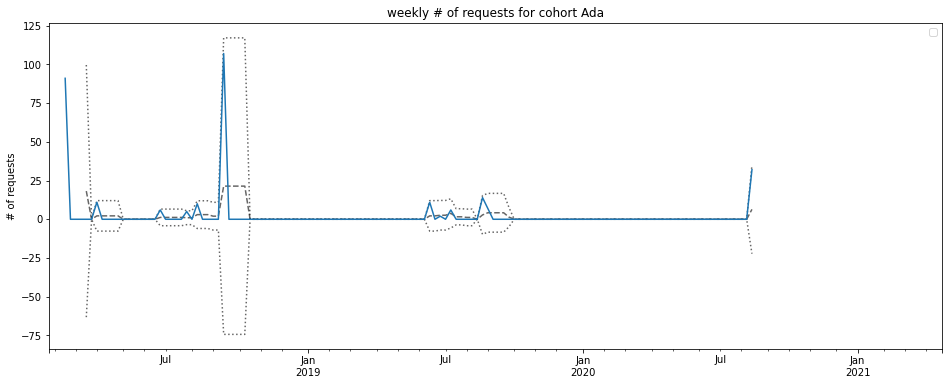

In [75]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Ada')
plt.ylabel('# of requests')

In [76]:
K = 2
N = 5
s = cohort_requests.iloc[:, 10]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2018-01-28 00:00:00+00:00,58.0,NaN,NaN,NaN
2018-02-04 00:00:00+00:00,54.0,NaN,NaN,NaN
2018-02-11 00:00:00+00:00,75.0,NaN,NaN,NaN
2018-02-18 00:00:00+00:00,334.0,NaN,NaN,NaN
2018-02-25 00:00:00+00:00,163.0,136.8,374.410606,-100.810606


Text(0, 0.5, '# of requests')

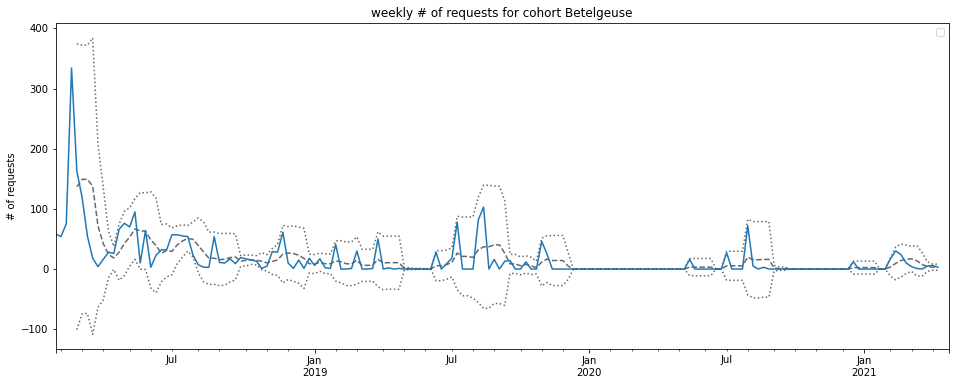

In [77]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Betelgeuse')
plt.ylabel('# of requests')

In [78]:
K = 2
N = 5
s = cohort_requests.iloc[:, 11]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std

Text(0, 0.5, '# of requests')

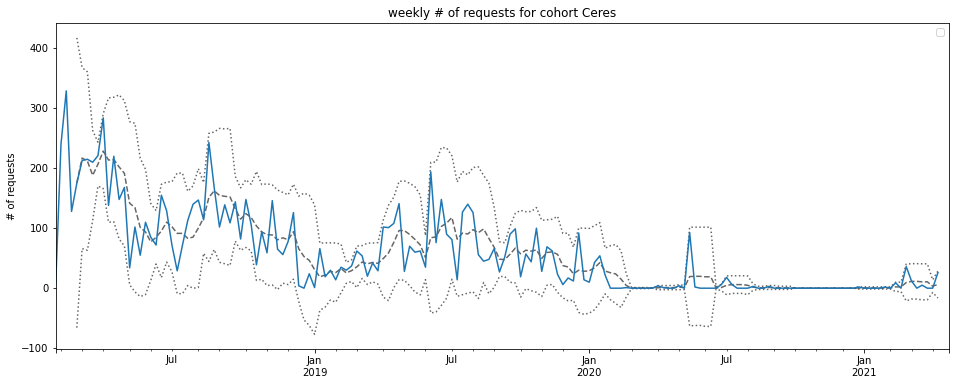

In [79]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort Ceres')
plt.ylabel('# of requests')

In [80]:

# now I want to map program_id in a dict
program_dict = {
    1 : 'Web Dev - PHP',
    2 : 'Web Dev - Java',
    3 : 'Data Science',
    4 : 'Web Dev - Front End'
}

In [81]:
df['program'] = df.program_id.map(program_dict)

In [82]:
# we can now drop the program_id column
df = df.drop(columns='program_id')

In [83]:
df.columns

Index(['path', 'user_id', 'cohort_id', 'ip', 'id', 'name', 'slack',
       'start_date', 'end_date', 'created_at', 'updated_at', 'program'],
      dtype='object')

Text(0, 0.5, 'Proportion of Requests')

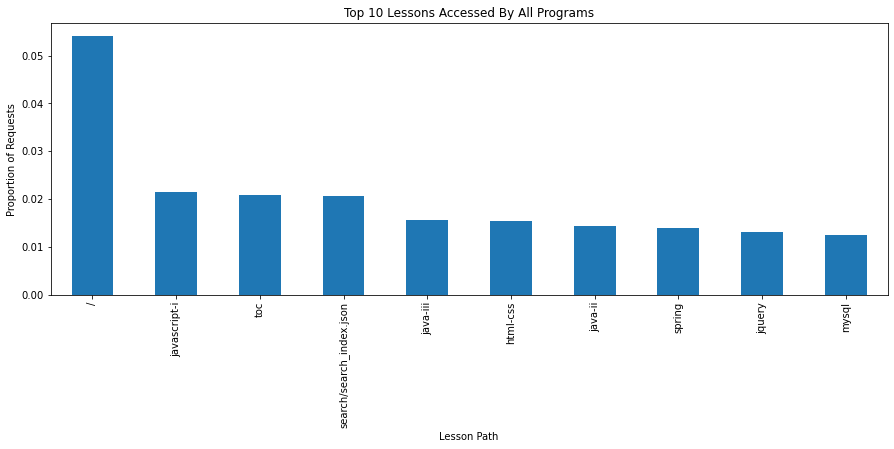

In [84]:
df['path'].value_counts(normalize=True).head(10).plot.bar(figsize=(15,5))
plt.title('Top 10 Lessons Accessed By All Programs')
plt.xlabel('Lesson Path')
plt.ylabel('Proportion of Requests')

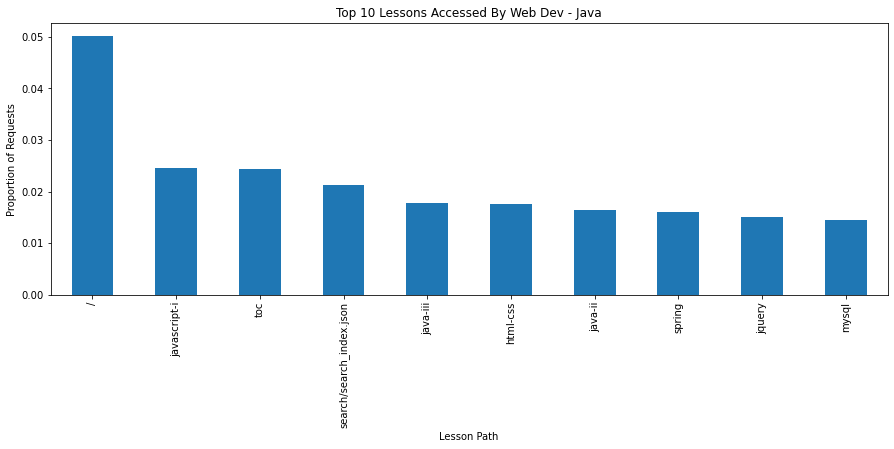

In [85]:
df[df.program == 'Web Dev - Java']['path'].value_counts(normalize=True).head(10).plot.bar(figsize=(15,5))
plt.title('Top 10 Lessons Accessed By Web Dev - Java')
plt.xlabel('Lesson Path')
plt.ylabel('Proportion of Requests')

In [86]:
df[df.program == 'Web Dev - Java']['path'].value_counts(normalize=True).head(10)

/                           0.050204
javascript-i                0.024471
toc                         0.024431
search/search_index.json    0.021324
java-iii                    0.017779
html-css                    0.017619
java-ii                     0.016428
spring                      0.015947
jquery                      0.014990
mysql                       0.014464
Name: path, dtype: float64

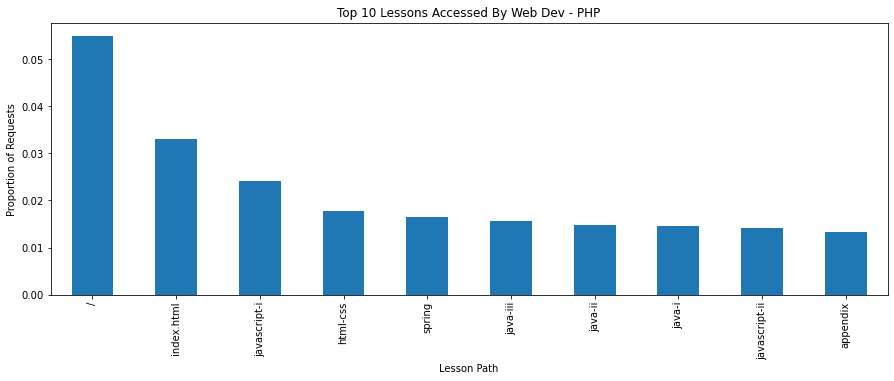

In [89]:
df[df.program == 'Web Dev - PHP']['path'].value_counts(normalize=True).head(10).plot.bar(figsize=(15,5))
plt.title('Top 10 Lessons Accessed By Web Dev - PHP')
plt.xlabel('Lesson Path')
plt.ylabel('Proportion of Requests')

In [92]:
df[df.program == 'Web Dev - PHP']['path']

date
2018-01-26 09:55:03+00:00                                                /
2018-01-26 09:56:02+00:00                                          java-ii
2018-01-26 09:56:05+00:00              java-ii/object-oriented-programming
2018-01-26 09:56:06+00:00               slides/object_oriented_programming
2018-01-26 10:14:47+00:00                                                /
                                                 ...                      
2021-04-10 00:20:55+00:00             content/javascript/conditionals.html
2021-04-10 00:21:15+00:00                    content/javascript/loops.html
2021-04-10 00:28:10+00:00     content/javascript/javascript-with-html.html
2021-04-10 00:28:11+00:00             content/javascript/conditionals.html
2021-04-10 00:28:11+00:00    content/javascript/gitbook/images/favicon.ico
Name: path, Length: 30548, dtype: object

Text(0, 0.5, 'Proportion of Requests')

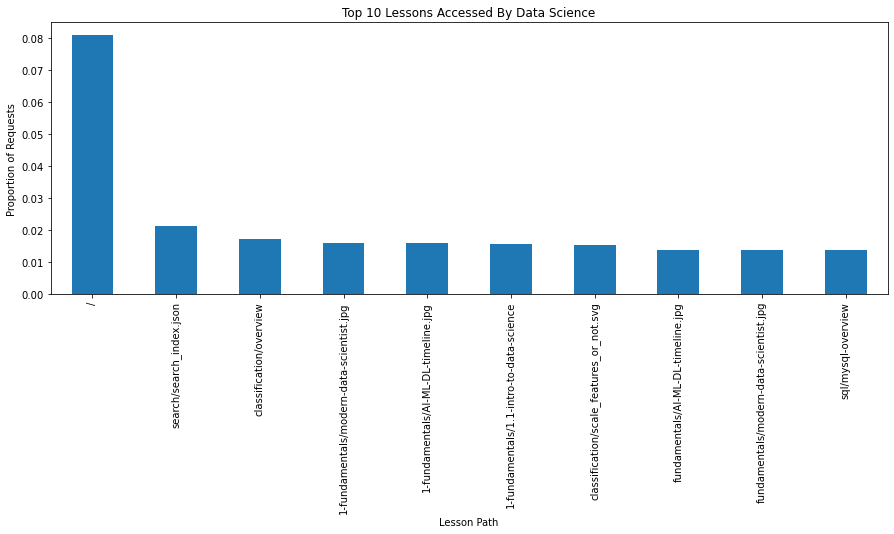

In [91]:
df[df.program == 'Data Science']['path'].value_counts(normalize=True).head(10).plot.bar(figsize=(15,5))
plt.title('Top 10 Lessons Accessed By Data Science')
plt.xlabel('Lesson Path')
plt.ylabel('Proportion of Requests')

Text(0, 0.5, 'Proportion of Requests')

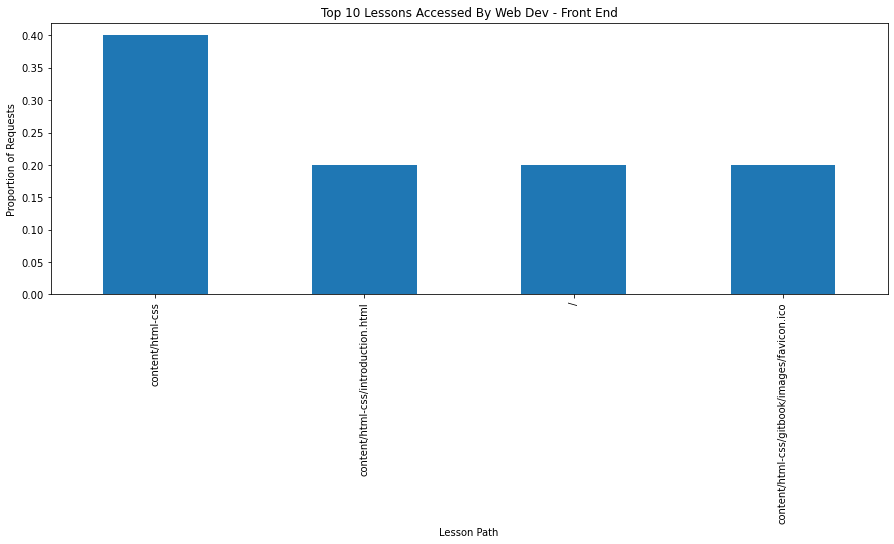

In [93]:
df[df.program == 'Web Dev - Front End']['path'].value_counts(normalize=True).head(10).plot.bar(figsize=(15,5))
plt.title('Top 10 Lessons Accessed By Web Dev - Front End')
plt.xlabel('Lesson Path')
plt.ylabel('Proportion of Requests')

In [ ]:
df[df.program == 'Data Science']['path'].value_counts(normalize=True).head(10).plot.bar(figsize=(15,5))
plt.title('Top 10 Lessons Accessed By Data Science')
plt.xlabel('Lesson Path')
plt.ylabel('Proportion of Requests')

<AxesSubplot:>

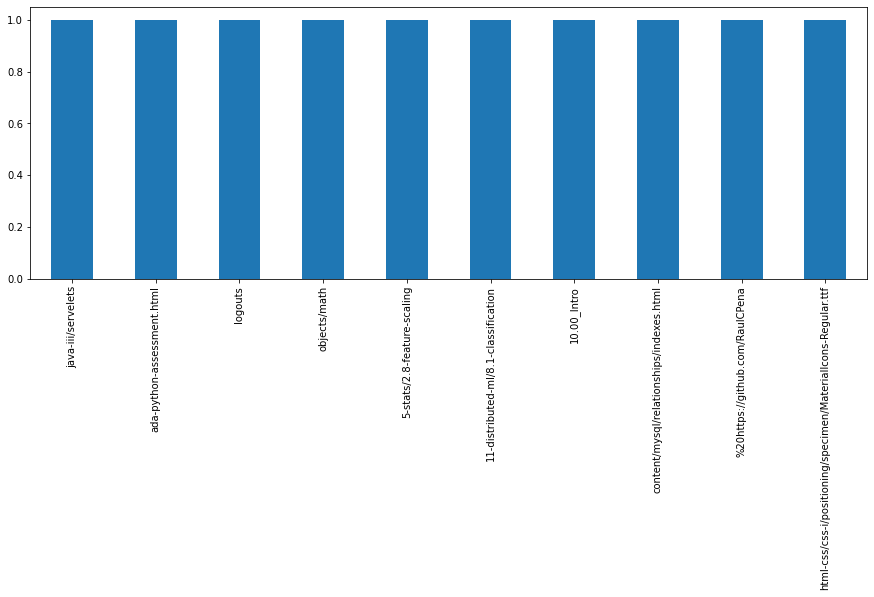

In [109]:
#look at requests that are more than 1 but less than 20
df['path'].value_counts().tail(10).plot.bar(figsize=(15,5))

Text(0, 0.5, 'Count of Requests')

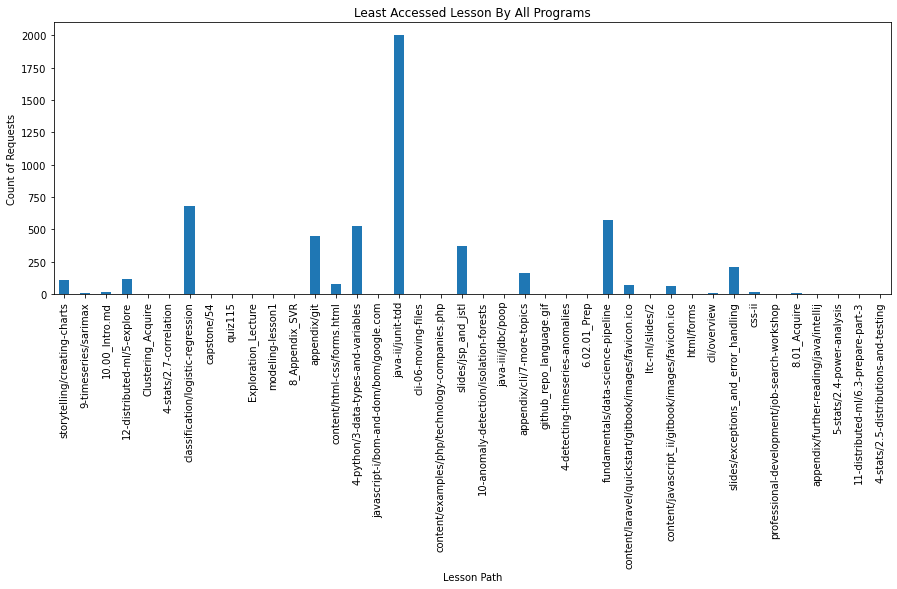

In [124]:
df['path'].value_counts().sample(40).plot.bar(figsize=(15,5))
plt.title('Least Accessed Lesson By All Programs')
plt.xlabel('Lesson Path')
plt.ylabel('Count of Requests')

In [125]:
#least_accessed = (np.where((df['path'].value_counts())> 5))| (np.where((df['path'].value_counts())< 30))
#b = np.where(a<4)
#print(b)
#least_accessed
#.np.where((df['path'].value_counts())< 30)

for these ip addresses with more than one start date any ip location other than 
97.105.19.61 which I determined was the Code up location may be anomalies, so let's look at just those other addresses

Zach's direction #4
high number of daily requests by user
time stamps right after another... to look for possible web scraping
most frequently visited pages - for web dev, for DS. (not sure if this was the one to turn into bulean values)
most popular pages by user


main discrete values to focus on:
-can turn these into continuous with methods Zach showed with resampling
cohort, lesson and path

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?